In [12]:
from pendulum import Record
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

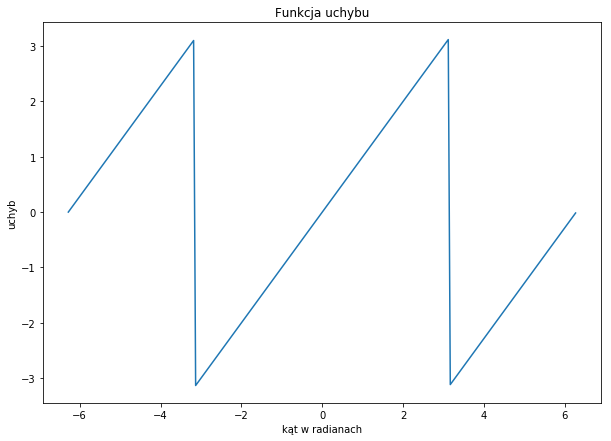

In [8]:
# Deviation function - funkcja uchybu
plt.figure(figsize=(10, 7))
res = []
for alfa in np.arange(-np.pi*2, np.pi*2, 0.05):
    e1 = np.abs(0  - alfa%(2*np.pi))
    e2 = np.abs(2*np.pi - alfa%(2*np.pi))
    if e1 < e2:
        e = e1
    else:
        e = -e2
    #plt.scatter(alfa, e)
    res.append((alfa, e))
a = np.array(res)
plt.plot(a[:, 0], a[:, 1])
plt.xlabel("kąt w radianach")
plt.ylabel("uchyb")
plt.title("Funkcja uchybu")
plt.savefig("error_function.png")
plt.show()

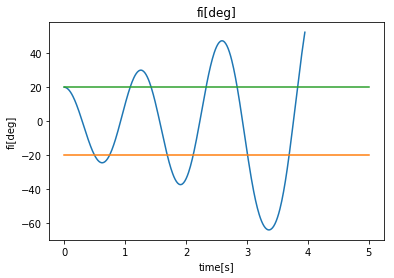

In [7]:
r = Record()
r.position_set(20)
r.PID_control(how_many_iter=80, Kp=310, Ki=0)  # Here are PID parameters
r.visualize(['fi'], r.stack_of_movement, separately=False)
plt.plot(np.linspace(0,5,100), [-20 for i in range(100)])
plt.plot(np.linspace(0,5,100), [20 for i in range(100)])

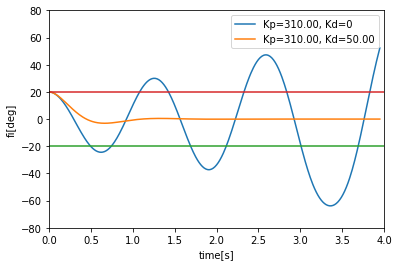

In [12]:
how_many_iter=80 #how long will take the simulation

#PID PARAMETERS
Kp=310
Kd=50

#First pendulum with PID parameters: Kp=310, Kd=0
r = Record()
r.position_set(20)
r.PID_control(how_many_iter=how_many_iter, Kp=Kp, Kd=0)    #controling with PID
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi, label="Kp=%0.2f, Kd=0"%(Kp)) # plotting

#Second pendulum with PID parameters: Kp=310, Kd=50
r = Record()
r.position_set(20)
r.PID_control(how_many_iter=how_many_iter, Kp=Kp, Kd=Kd)    #controling with PID
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi, label="Kp=%0.2f, Kd=%0.2f"%(Kp, Kd)) # plotting

# Plotting parameters
plt.plot(np.linspace(0,5,5), [-20 for i in range(5)]) # plotting horizontal line at y=-20
plt.plot(np.linspace(0,5,5), [20 for i in range(5)])  # plotting horizontal line at y=20
plt.xlabel('time[s]')
plt.ylabel('fi[deg]')
plt.xlim(0, 4)
plt.ylim(-80, 80)
plt.legend()

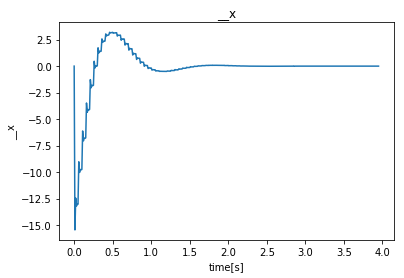

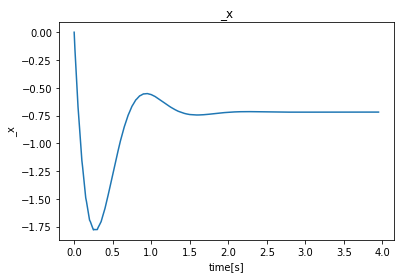

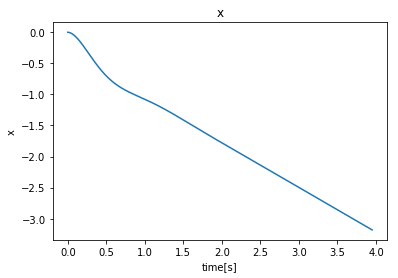

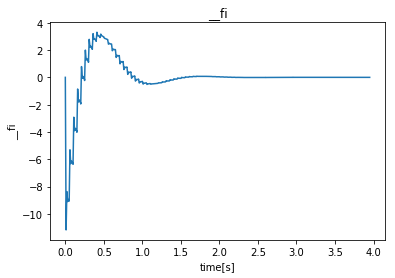

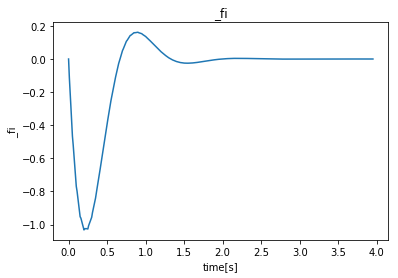

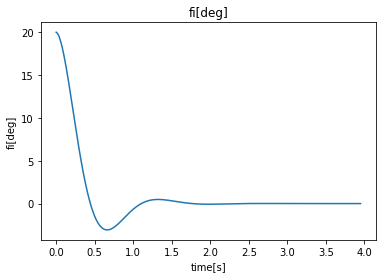

In [13]:
# characteristics of moves of the pendulum with Kp=310, Kd=50
r.visualize(source=r.stack_of_movement, features=['move'], separately=True)

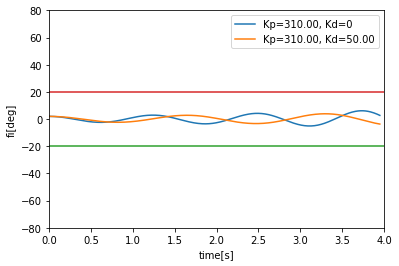

In [3]:
how_many_iter=80 #how long will take the simulation

#PID PARAMETERS
Kp=310
Kd=50

#First pendulum with PID parameters: Kp=310, Kd=0
r = Record()
r.position_set(2)
r.PID_control(how_many_iter=how_many_iter, Kp=300, Kd=0)    #controling with PID
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi, label="Kp=%0.2f, Kd=0"%(Kp)) # plotting

#Second pendulum with PID parameters: Kp=310, Kd=50
r = Record()
r.position_set(2)
r.PID_control(how_many_iter=how_many_iter, Kp=200, Kd=0)    #controling with PID
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi, label="Kp=%0.2f, Kd=%0.2f"%(Kp, Kd)) # plotting

# Plotting parameters
plt.plot(np.linspace(0,5,5), [-20 for i in range(5)]) # plotting horizontal line at y=-20
plt.plot(np.linspace(0,5,5), [20 for i in range(5)])  # plotting horizontal line at y=20
plt.xlabel('time[s]')
plt.ylabel('fi[deg]')
plt.xlim(0, 4)
plt.ylim(-80, 80)
plt.legend()

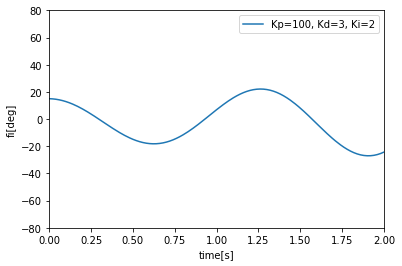

In [11]:
how_many_iter=80 #how long will take the simulation

#PID PARAMETERS
Kp=100
Kd=3
Ki=2

#First pendulum with PID parameters: Kp=310, Kd=0
r = Record()
r.position_set(15)
r.PID_control(how_many_iter=how_many_iter, Kp=300, Kd=0)    #controling with PID
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi, label="Kp=%0.0f, Kd=%0.0f, Ki=%0.0f"%(Kp, Kd, Ki)) # plotting

# Plotting parameters
#plt.plot(np.linspace(0,5,5), [-20 for i in range(5)]) # plotting horizontal line at y=-20
#plt.plot(np.linspace(0,5,5), [20 for i in range(5)])  # plotting horizontal line at y=20
plt.xlabel('time[s]')
plt.ylabel('fi[deg]')
plt.xlim(0, 2)
plt.ylim(-80, 80)
plt.legend()

In [17]:
def find_minimums(y):
    y1=y[2:]
    y2=y[1:-1]
    y3=y[:-2]
    m1 = (y1>y2) 
    m2 =(y2<y3)
    mask = m1 & m2
    extremas =y2[mask]
    return extremas

def log_dek(table):
    t1 = table[:-1]
    t2 = table[1:]
    return (t2/t1)

[1.52491895 1.71464918]


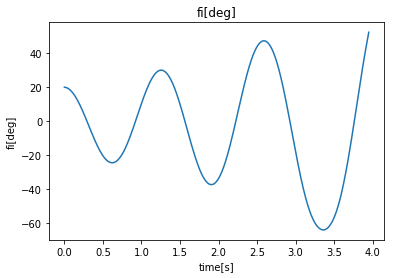

In [18]:
r = Record()
r.position_set(20)
r.PID_control(how_many_iter=80, Kp=310, Ki=0)  # Here are PID parameters
r.visualize(['fi'], r.stack_of_movement, separately=False)
print(log_dek(find_minimums(np.array(r.stack_of_movement['fi']))))

[2.41674393]


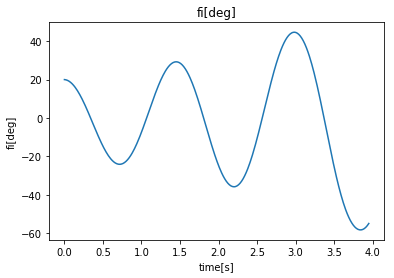

In [19]:
r = Record()
r.position_set(20)
r.PID_control(how_many_iter=80, Kp=250, Ki=0)  # Here are PID parameters
r.visualize(['fi'], r.stack_of_movement, separately=False)
print(log_dek(find_minimums(np.array(r.stack_of_movement['fi']))))

[1.58952059 2.01340421]


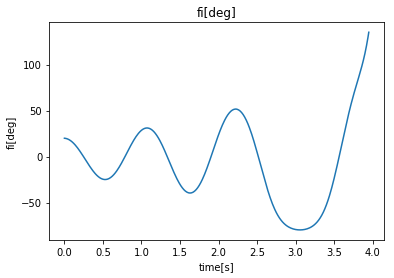

In [20]:
r = Record()
r.position_set(20)
r.PID_control(how_many_iter=80, Kp=400, Ki=0)  # Here are PID parameters
r.visualize(['fi'], r.stack_of_movement, separately=False)
print(log_dek(find_minimums(np.array(r.stack_of_movement['fi']))))

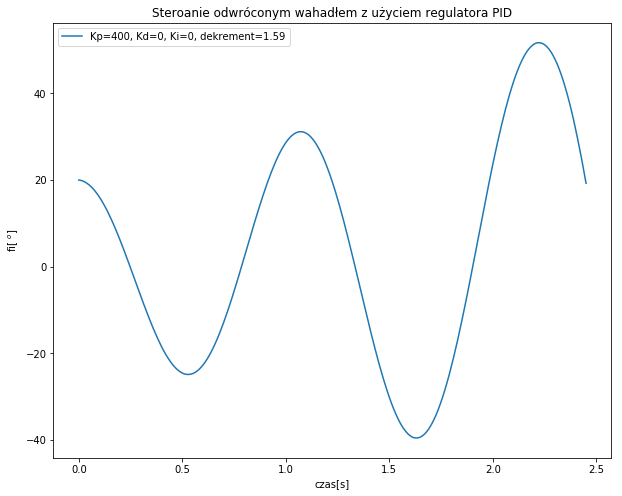

In [34]:
Kp = 400
Ki=0
Kd=0
r = Record()
r.position_set(20)
r.PID_control(how_many_iter=50, Kp=Kp, Ki=Ki, Kd=Kd)  # Here are PID parameters
dek = log_dek(find_minimums(np.array(r.stack_of_movement['fi'])))

plt.figure(figsize=(10,8))
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi)
plt.xlabel("czas[s]")
plt.ylabel("fi[$\ ^o$]")
plt.title("Steroanie odwróconym wahadłem z użyciem regulatora PID")
plt.legend(["Kp=%0.0f, Kd=%0.0f, Ki=%0.0f, dekrement=%0.2f"%(Kp, Kd, Ki, dek[0]) ])
plt.show()

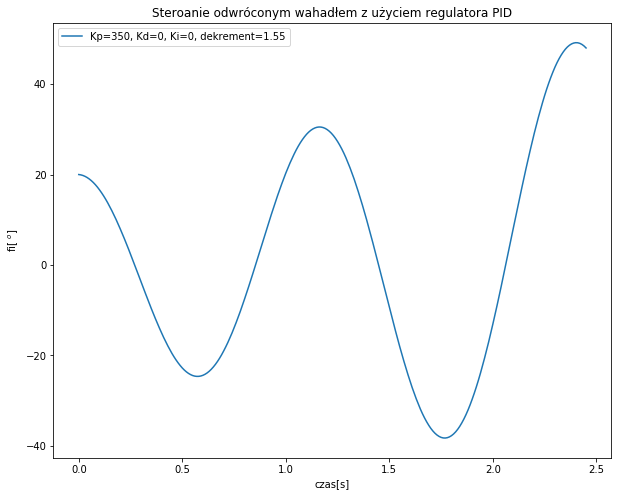

In [35]:
Kp = 350
Ki=0
Kd=0
r = Record()
r.position_set(20)
r.PID_control(how_many_iter=50, Kp=Kp, Ki=Ki, Kd=Kd)  # Here are PID parameters
dek = log_dek(find_minimums(np.array(r.stack_of_movement['fi'])))

plt.figure(figsize=(10,8))
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi)
plt.xlabel("czas[s]")
plt.ylabel("fi[$\ ^o$]")
plt.title("Steroanie odwróconym wahadłem z użyciem regulatora PID")
plt.legend(["Kp=%0.0f, Kd=%0.0f, Ki=%0.0f, dekrement=%0.2f"%(Kp, Kd, Ki, dek[0]) ])
plt.show()

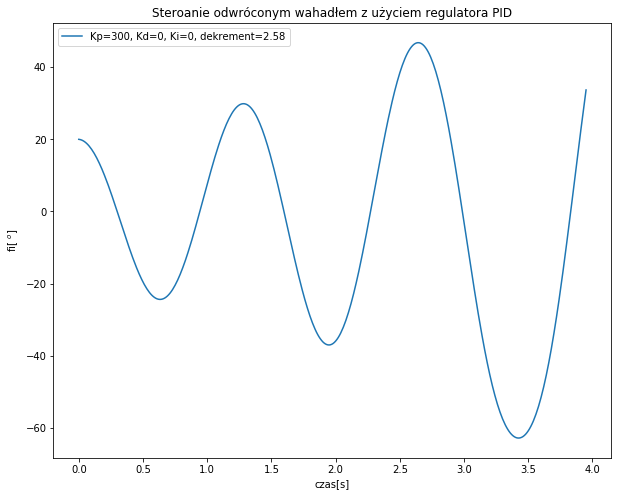

In [37]:
Kp = 300
Ki=0
Kd=0
r = Record()
r.position_set(20)
r.PID_control(how_many_iter=80, Kp=Kp, Ki=Ki, Kd=Kd)  # Here are PID parameters
dek = log_dek(find_minimums(np.array(r.stack_of_movement['fi'])))

plt.figure(figsize=(10,8))
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi)
plt.xlabel("czas[s]")
plt.ylabel("fi[$\ ^o$]")
plt.title("Steroanie odwróconym wahadłem z użyciem regulatora PID")
plt.legend(["Kp=%0.0f, Kd=%0.0f, Ki=%0.0f, dekrement=%0.2f"%(Kp, Kd, Ki, dek[0]) ])
plt.show()

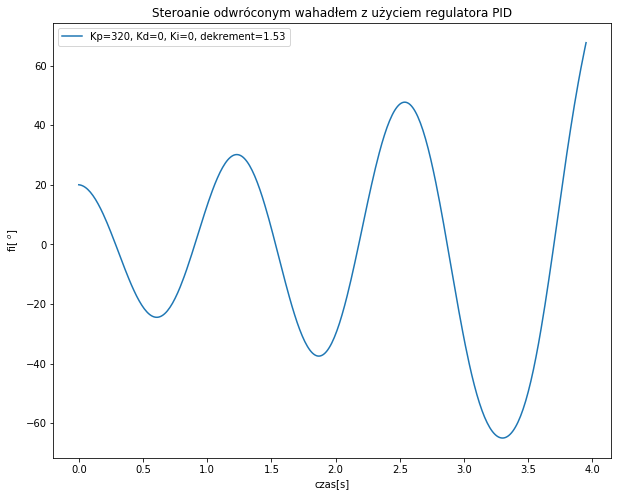

In [38]:
Kp = 320
Ki=0
Kd=0
r = Record()
r.position_set(20)
r.PID_control(how_many_iter=80, Kp=Kp, Ki=Ki, Kd=Kd)  # Here are PID parameters
dek = log_dek(find_minimums(np.array(r.stack_of_movement['fi'])))

plt.figure(figsize=(10,8))
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi)
plt.xlabel("czas[s]")
plt.ylabel("fi[$\ ^o$]")
plt.title("Steroanie odwróconym wahadłem z użyciem regulatora PID")
plt.legend(["Kp=%0.0f, Kd=%0.0f, Ki=%0.0f, dekrement=%0.2f"%(Kp, Kd, Ki, dek[0]) ])
plt.show()

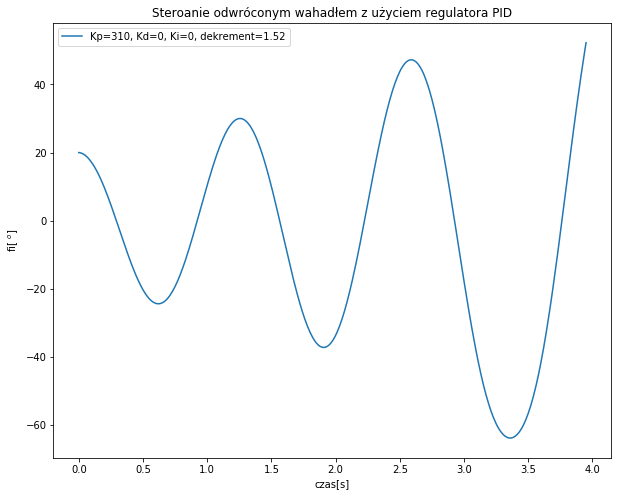

In [39]:
Kp = 310
Ki=0
Kd=0
r = Record()
r.position_set(20)
r.PID_control(how_many_iter=80, Kp=Kp, Ki=Ki, Kd=Kd)  # Here are PID parameters
dek = log_dek(find_minimums(np.array(r.stack_of_movement['fi'])))

plt.figure(figsize=(10,8))
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi)
plt.xlabel("czas[s]")
plt.ylabel("fi[$\ ^o$]")
plt.title("Steroanie odwróconym wahadłem z użyciem regulatora PID")
plt.legend(["Kp=%0.0f, Kd=%0.0f, Ki=%0.0f, dekrement=%0.2f"%(Kp, Kd, Ki, dek[0]) ])
plt.show()

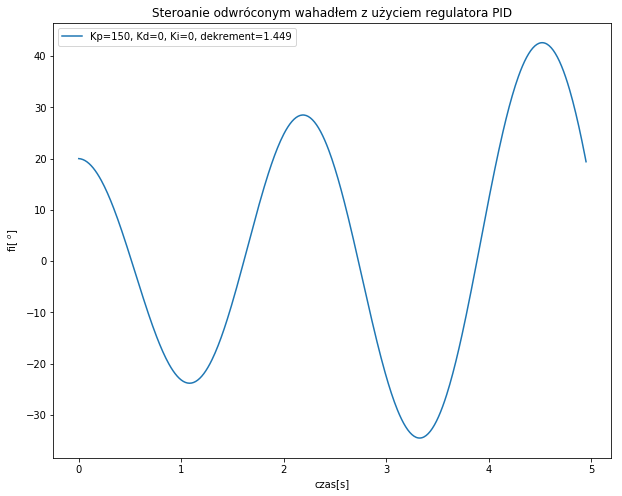

In [51]:
Kp = 150
Ki=0
Kd=0
r = Record()
r.position_set(20)
r.PID_control(how_many_iter=100, Kp=Kp, Ki=Ki, Kd=Kd)  # Here are PID parameters
dek = log_dek(find_minimums(np.array(r.stack_of_movement['fi'])))

plt.figure(figsize=(10,8))
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi)
plt.xlabel("czas[s]")
plt.ylabel("fi[$\ ^o$]")
plt.title("Steroanie odwróconym wahadłem z użyciem regulatora PID")
plt.legend(["Kp=%0.0f, Kd=%0.0f, Ki=%0.0f, dekrement=%0.3f"%(Kp, Kd, Ki, dek[0]) ])
plt.show()

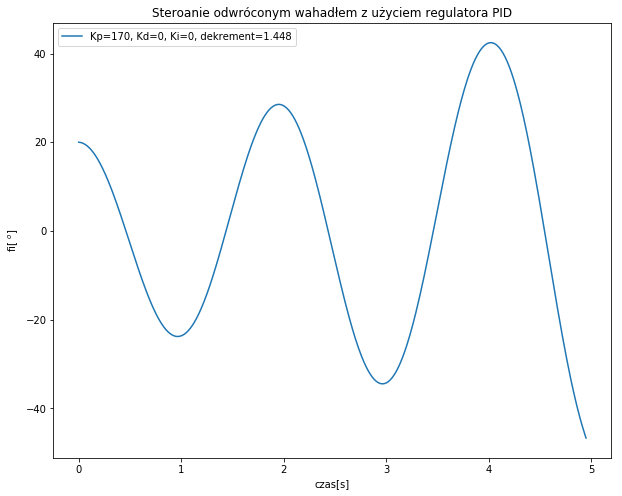

In [52]:
Kp = 170
Ki=0
Kd=0
r = Record()
r.position_set(20)
r.PID_control(how_many_iter=100, Kp=Kp, Ki=Ki, Kd=Kd)  # Here are PID parameters
dek = log_dek(find_minimums(np.array(r.stack_of_movement['fi'])))

plt.figure(figsize=(10,8))
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi)
plt.xlabel("czas[s]")
plt.ylabel("fi[$\ ^o$]")
plt.title("Steroanie odwróconym wahadłem z użyciem regulatora PID")
plt.legend(["Kp=%0.0f, Kd=%0.0f, Ki=%0.0f, dekrement=%0.3f"%(Kp, Kd, Ki, dek[0]) ])
plt.show()

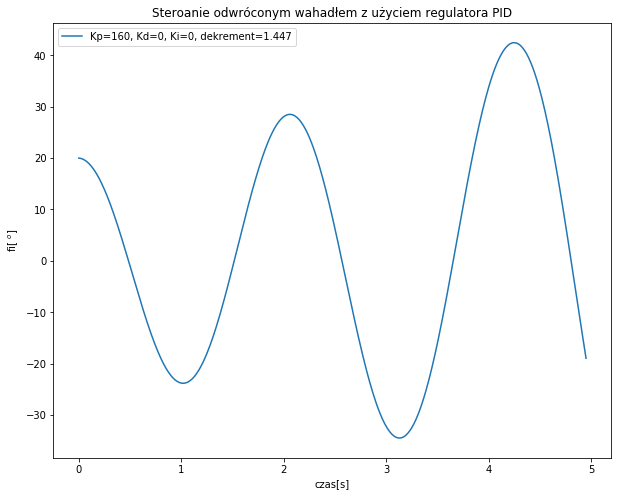

In [54]:
Kp = 160
Ki=0
Kd=0
r = Record()
r.position_set(20)
r.PID_control(how_many_iter=100, Kp=Kp, Ki=Ki, Kd=Kd)  # Here are PID parameters
dek = log_dek(find_minimums(np.array(r.stack_of_movement['fi'])))

plt.figure(figsize=(10,8))
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi)
plt.xlabel("czas[s]")
plt.ylabel("fi[$\ ^o$]")
plt.title("Steroanie odwróconym wahadłem z użyciem regulatora PID")
plt.legend(["Kp=%0.0f, Kd=%0.0f, Ki=%0.0f, dekrement=%0.3f"%(Kp, Kd, Ki, dek[0]) ])
plt.show()

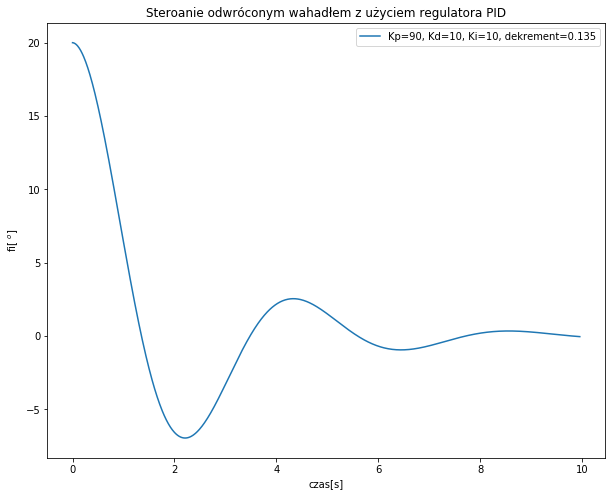

In [56]:
Kp = 90
Ki=10
Kd=10
r = Record()
r.position_set(20)
r.PID_control(how_many_iter=200, Kp=Kp, Ki=Ki, Kd=Kd)  # Here are PID parameters
dek = log_dek(find_minimums(np.array(r.stack_of_movement['fi'])))

plt.figure(figsize=(10,8))
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi)
plt.xlabel("czas[s]")
plt.ylabel("fi[$\ ^o$]")
plt.title("Steroanie odwróconym wahadłem z użyciem regulatora PID")
plt.legend(["Kp=%0.0f, Kd=%0.0f, Ki=%0.0f, dekrement=%0.3f"%(Kp, Kd, Ki, dek[0]) ])
plt.show()

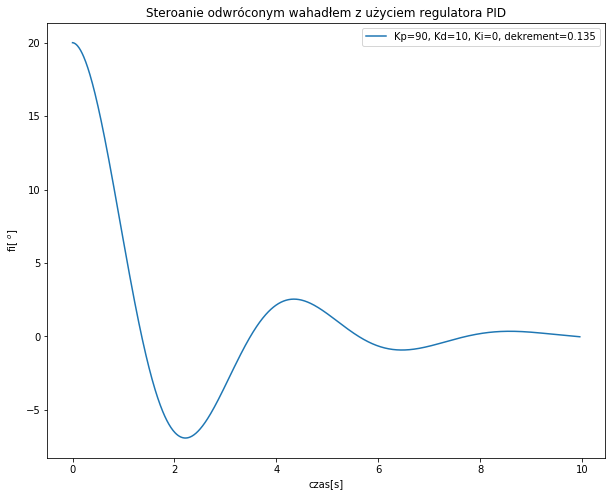

In [57]:
Kp = 90
Ki=0
Kd=10
r = Record()
r.position_set(20)
r.PID_control(how_many_iter=200, Kp=Kp, Ki=Ki, Kd=Kd)  # Here are PID parameters
dek = log_dek(find_minimums(np.array(r.stack_of_movement['fi'])))

plt.figure(figsize=(10,8))
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi)
plt.xlabel("czas[s]")
plt.ylabel("fi[$\ ^o$]")
plt.title("Steroanie odwróconym wahadłem z użyciem regulatora PID")
plt.legend(["Kp=%0.0f, Kd=%0.0f, Ki=%0.0f, dekrement=%0.3f"%(Kp, Kd, Ki, dek[0]) ])
plt.show()

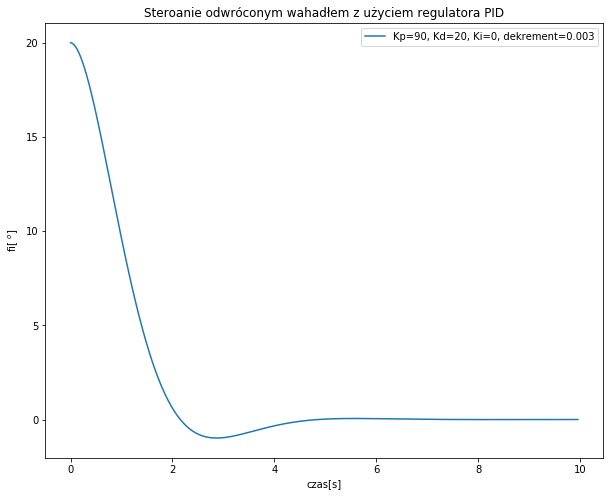

In [58]:
Kp = 90
Ki=0
Kd=20
r = Record()
r.position_set(20)
r.PID_control(how_many_iter=200, Kp=Kp, Ki=Ki, Kd=Kd)  # Here are PID parameters
dek = log_dek(find_minimums(np.array(r.stack_of_movement['fi'])))

plt.figure(figsize=(10,8))
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi)
plt.xlabel("czas[s]")
plt.ylabel("fi[$\ ^o$]")
plt.title("Steroanie odwróconym wahadłem z użyciem regulatora PID")
plt.legend(["Kp=%0.0f, Kd=%0.0f, Ki=%0.0f, dekrement=%0.3f"%(Kp, Kd, Ki, dek[0]) ])
plt.show()

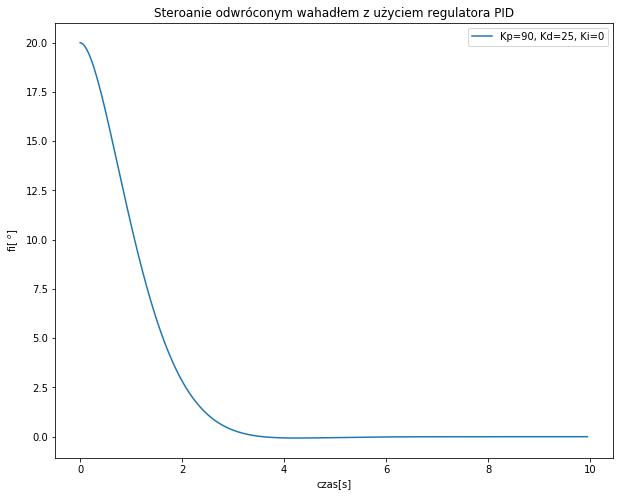

In [61]:
Kp = 90
Ki=0
Kd=25
r = Record()
r.position_set(20)
r.PID_control(how_many_iter=200, Kp=Kp, Ki=Ki, Kd=Kd)  # Here are PID parameters
dek = log_dek(find_minimums(np.array(r.stack_of_movement['fi'])))

plt.figure(figsize=(10,8))
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi)
plt.xlabel("czas[s]")
plt.ylabel("fi[$\ ^o$]")
plt.title("Steroanie odwróconym wahadłem z użyciem regulatora PID")
plt.legend(["Kp=%0.0f, Kd=%0.0f, Ki=%0.0f"%(Kp, Kd, Ki) ])
plt.show()

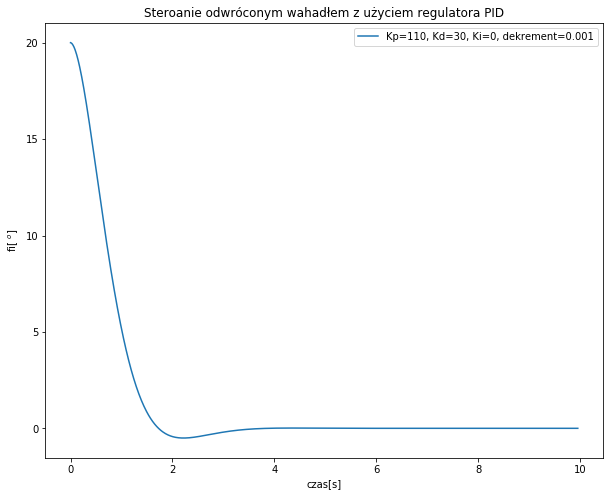

In [62]:
Kp = 130
Ki=0
Kd=30
r = Record()
r.position_set(20)
r.PID_control(how_many_iter=200, Kp=Kp, Ki=Ki, Kd=Kd)  # Here are PID parameters
dek = log_dek(find_minimums(np.array(r.stack_of_movement['fi'])))

plt.figure(figsize=(10,8))
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi)
plt.xlabel("czas[s]")
plt.ylabel("fi[$\ ^o$]")
plt.title("Steroanie odwróconym wahadłem z użyciem regulatora PID")
plt.legend(["Kp=%0.0f, Kd=%0.0f, Ki=%0.0f, dekrement=%0.3f"%(Kp, Kd, Ki, dek[0]) ])
plt.show()

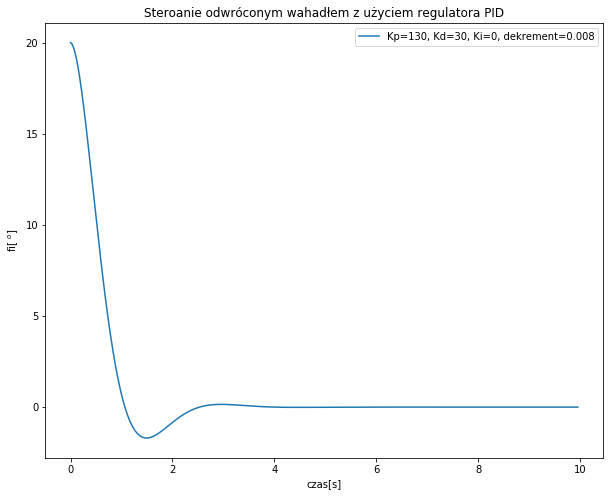

In [63]:
Kp = 130
Ki=0
Kd=30
r = Record()
r.position_set(20)
r.PID_control(how_many_iter=200, Kp=Kp, Ki=Ki, Kd=Kd)  # Here are PID parameters
dek = log_dek(find_minimums(np.array(r.stack_of_movement['fi'])))

plt.figure(figsize=(10,8))
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi)
plt.xlabel("czas[s]")
plt.ylabel("fi[$\ ^o$]")
plt.title("Steroanie odwróconym wahadłem z użyciem regulatora PID")
plt.legend(["Kp=%0.0f, Kd=%0.0f, Ki=%0.0f, dekrement=%0.3f"%(Kp, Kd, Ki, dek[0]) ])
plt.show()

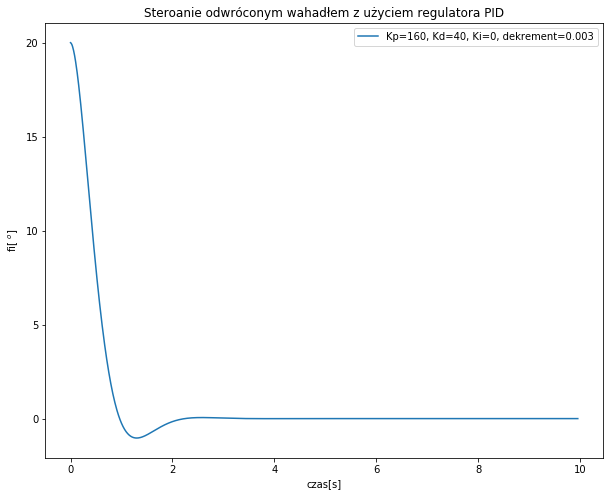

In [65]:
Kp = 160
Ki=0
Kd=40
r = Record()
r.position_set(20)
r.PID_control(how_many_iter=200, Kp=Kp, Ki=Ki, Kd=Kd)  # Here are PID parameters
dek = log_dek(find_minimums(np.array(r.stack_of_movement['fi'])))

plt.figure(figsize=(10,8))
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi)
plt.xlabel("czas[s]")
plt.ylabel("fi[$\ ^o$]")
plt.title("Steroanie odwróconym wahadłem z użyciem regulatora PID")
plt.legend(["Kp=%0.0f, Kd=%0.0f, Ki=%0.0f, dekrement=%0.3f"%(Kp, Kd, Ki, dek[0]) ])
plt.show()

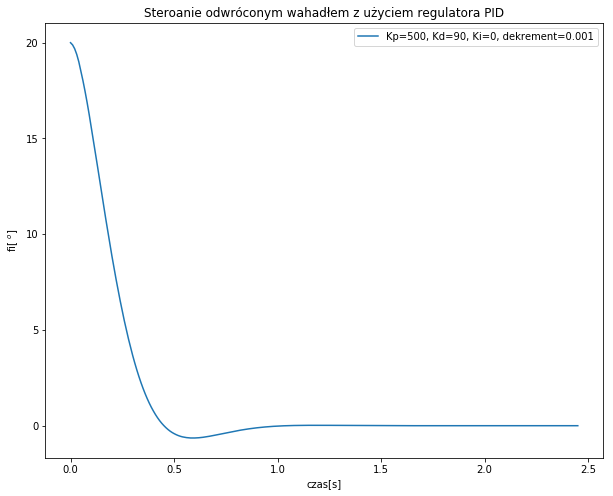

In [70]:
Kp = 500
Ki=0
Kd=90
r = Record()
r.position_set(20)
r.PID_control(how_many_iter=50, Kp=Kp, Ki=Ki, Kd=Kd)  # Here are PID parameters
dek = log_dek(find_minimums(np.array(r.stack_of_movement['fi'])))

plt.figure(figsize=(10,8))
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi)
plt.xlabel("czas[s]")
plt.ylabel("fi[$\ ^o$]")
plt.title("SteroWanie odwróconym wahadłem z użyciem regulatora PID")
plt.legend(["Kp=%0.0f, Kd=%0.0f, Ki=%0.0f, dekrement=%0.3f"%(Kp, Kd, Ki, dek[0]) ])
plt.show()

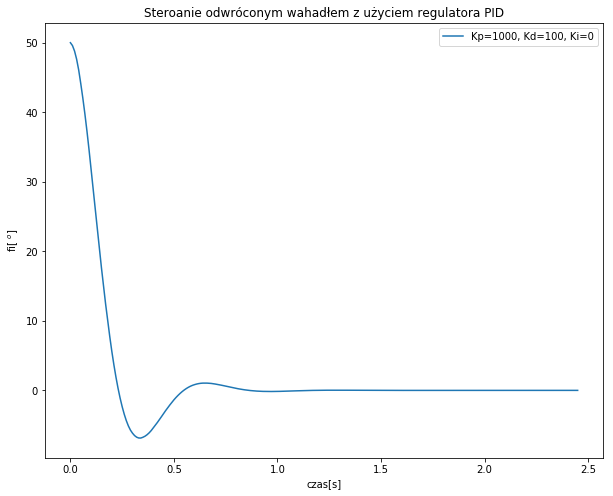

In [84]:
Kp = 1000
Ki=0
Kd=100
r = Record()
r.position_set(50)
r.PID_control(how_many_iter=50, Kp=Kp, Ki=Ki, Kd=Kd)  # Here are PID parameters
dek = log_dek(find_minimums(np.array(r.stack_of_movement['fi'])))

plt.figure(figsize=(10,8))
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi)
plt.xlabel("czas[s]")
plt.ylabel("fi[$\ ^o$]")
plt.title("Steroanie odwróconym wahadłem z użyciem regulatora PID")
plt.legend(["Kp=%0.0f, Kd=%0.0f, Ki=%0.0f"%(Kp, Kd, Ki) ])
plt.show()

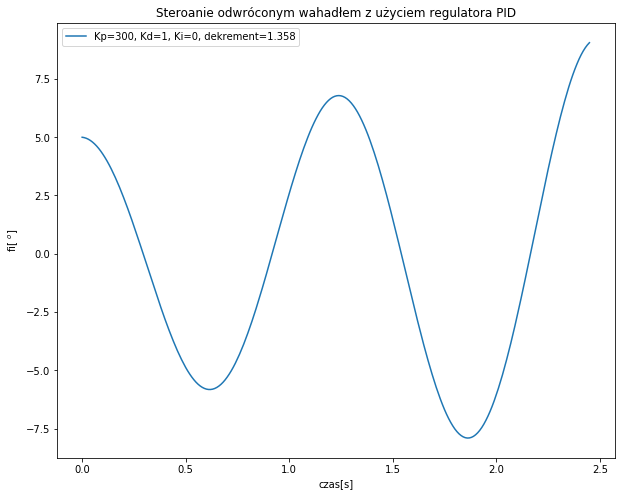

In [78]:
Kp = 300
Ki=0
Kd=1
r = Record()
r.position_set(5)
r.PID_control(how_many_iter=50, Kp=Kp, Ki=Ki, Kd=Kd)  # Here are PID parameters
dek = log_dek(find_minimums(np.array(r.stack_of_movement['fi'])))

plt.figure(figsize=(10,8))
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi)
plt.xlabel("czas[s]")
plt.ylabel("fi[$\ ^o$]")
plt.title("Steroanie odwróconym wahadłem z użyciem regulatora PID")
plt.legend(["Kp=%0.0f, Kd=%0.0f, Ki=%0.0f, dekrement=%0.3f"%(Kp, Kd, Ki, dek[0]) ])
plt.show()

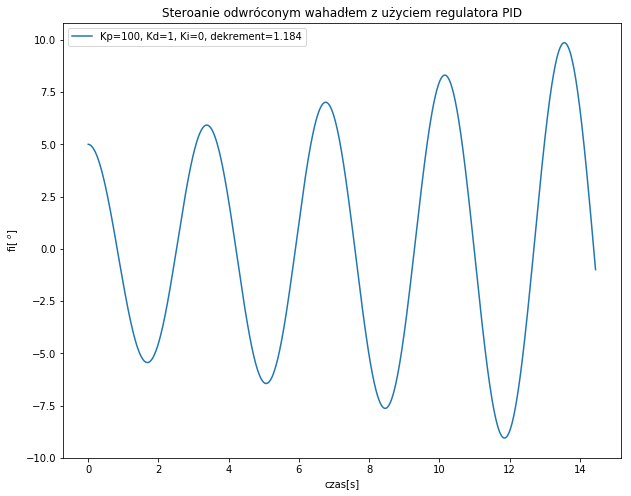

In [82]:
Kp = 100
Ki=0
Kd=1
r = Record()
r.position_set(5)
r.PID_control(how_many_iter=290, Kp=Kp, Ki=Ki, Kd=Kd)  # Here are PID parameters
dek = log_dek(find_minimums(np.array(r.stack_of_movement['fi'])))

plt.figure(figsize=(10,8))
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi)
plt.xlabel("czas[s]")
plt.ylabel("fi[$\ ^o$]")
plt.title("Steroanie odwróconym wahadłem z użyciem regulatora PID")
plt.legend(["Kp=%0.0f, Kd=%0.0f, Ki=%0.0f, dekrement=%0.3f"%(Kp, Kd, Ki, dek[0]) ])
plt.show()

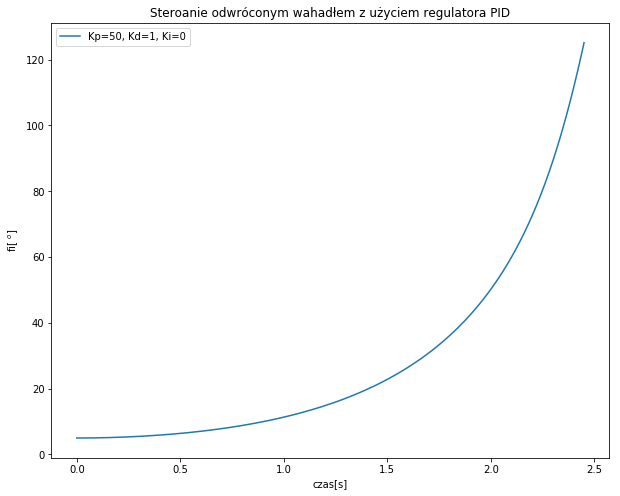

In [85]:
Kp = 50
Ki=0
Kd=1
r = Record()
r.position_set(5)
r.PID_control(how_many_iter=50, Kp=Kp, Ki=Ki, Kd=Kd)  # Here are PID parameters
dek = log_dek(find_minimums(np.array(r.stack_of_movement['fi'])))

plt.figure(figsize=(10,8))
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi)
plt.xlabel("czas[s]")
plt.ylabel("fi[$\ ^o$]")
plt.title("Steroanie odwróconym wahadłem z użyciem regulatora PID")
plt.legend(["Kp=%0.0f, Kd=%0.0f, Ki=%0.0f"%(Kp, Kd, Ki) ])
plt.show()

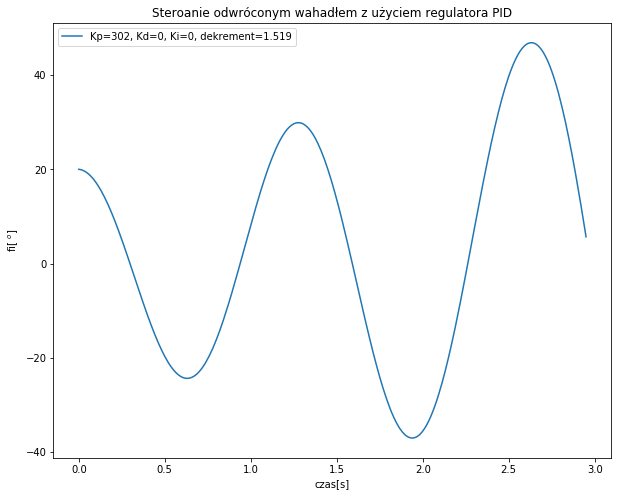

In [44]:
Kp = 302
Ki=0
Kd=0
r = Record()
r.position_set(20)
r.PID_control(how_many_iter=60, Kp=Kp, Ki=Ki, Kd=Kd)  # Here are PID parameters
dek = log_dek(find_minimums(np.array(r.stack_of_movement['fi'])))

plt.figure(figsize=(10,8))
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi)
plt.xlabel("czas[s]")
plt.ylabel("fi[$\ ^o$]")
plt.title("Steroanie odwróconym wahadłem z użyciem regulatora PID")
plt.legend(["Kp=%0.0f, Kd=%0.0f, Ki=%0.0f, dekrement=%0.3f"%(Kp, Kd, Ki, dek[0]) ])
plt.show()

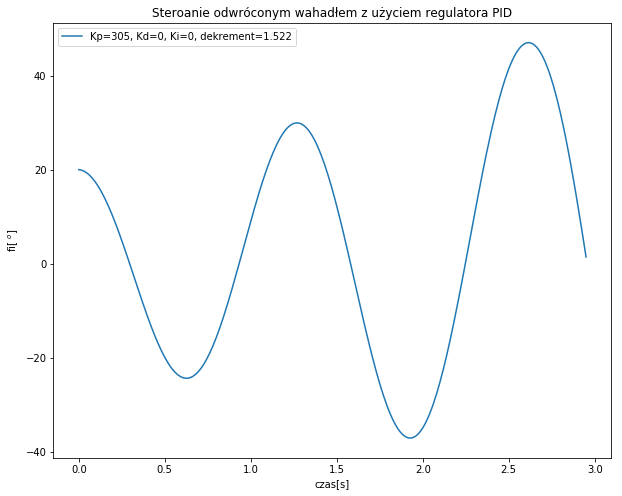

In [41]:
Kp = 305
Ki=0
Kd=0
r = Record()
r.position_set(20)
r.PID_control(how_many_iter=60, Kp=Kp, Ki=Ki, Kd=Kd)  # Here are PID parameters
dek = log_dek(find_minimums(np.array(r.stack_of_movement['fi'])))

plt.figure(figsize=(10,8))
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi)
plt.xlabel("czas[s]")
plt.ylabel("fi[$\ ^o$]")
plt.title("Steroanie odwróconym wahadłem z użyciem regulatora PID")
plt.legend(["Kp=%0.0f, Kd=%0.0f, Ki=%0.0f, dekrement=%0.3f"%(Kp, Kd, Ki, dek[0]) ])
plt.show()

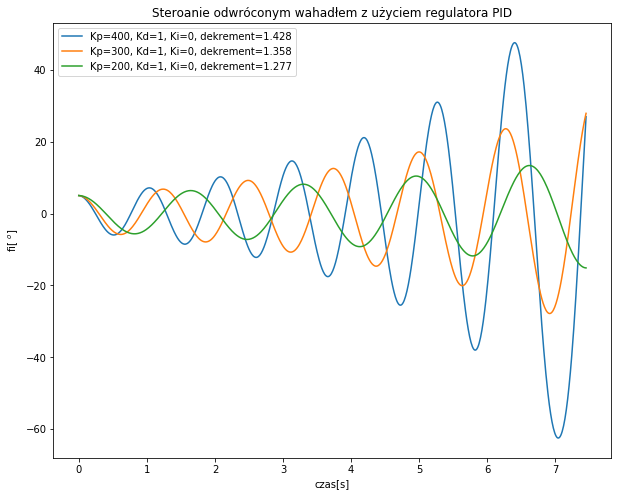

In [89]:
plt.figure(figsize=(10,8))
plt.xlabel("czas[s]")
plt.ylabel("fi[$\ ^o$]")
plt.title("Steroanie odwróconym wahadłem z użyciem regulatora PID")

Kp = 80
Ki=0
Kd=1
r = Record()
r.position_set(5)
r.PID_control(how_many_iter=150, Kp=Kp, Ki=Ki, Kd=Kd)  # Here are PID parameters
dek = log_dek(find_minimums(np.array(r.stack_of_movement['fi'])))
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi, label=("Kp=%0.0f, Kd=%0.0f, Ki=%0.0f, dekrement=%0.3f"%(Kp, Kd, Ki, dek[0])))

Kp = 150
Ki=0
Kd=1
r = Record()
r.position_set(5)
r.PID_control(how_many_iter=150, Kp=Kp, Ki=Ki, Kd=Kd)  # Here are PID parameters
dek = log_dek(find_minimums(np.array(r.stack_of_movement['fi'])))
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi, label=("Kp=%0.0f, Kd=%0.0f, Ki=%0.0f, dekrement=%0.3f"%(Kp, Kd, Ki, dek[0])))

Kp = 200
Ki=0
Kd=1
r = Record()
r.position_set(5)
r.PID_control(how_many_iter=150, Kp=Kp, Ki=Ki, Kd=Kd)  # Here are PID parameters
dek = log_dek(find_minimums(np.array(r.stack_of_movement['fi'])))
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi, label=("Kp=%0.0f, Kd=%0.0f, Ki=%0.0f, dekrement=%0.3f"%(Kp, Kd, Ki, dek[0])))


plt.legend()
plt.show()

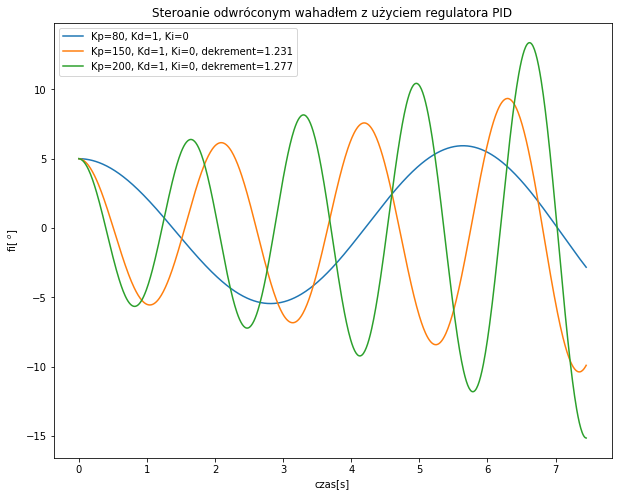

In [91]:
plt.figure(figsize=(10,8))
plt.xlabel("czas[s]")
plt.ylabel("fi[$\ ^o$]")
plt.title("Steroanie odwróconym wahadłem z użyciem regulatora PID")

Kp = 80
Ki=0
Kd=1
r = Record()
r.position_set(5)
r.PID_control(how_many_iter=150, Kp=Kp, Ki=Ki, Kd=Kd)  # Here are PID parameters
dek = log_dek(find_minimums(np.array(r.stack_of_movement['fi'])))
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi, label=("Kp=%0.0f, Kd=%0.0f, Ki=%0.0f"%(Kp, Kd, Ki)))

Kp = 150
Ki=0
Kd=1
r = Record()
r.position_set(5)
r.PID_control(how_many_iter=150, Kp=Kp, Ki=Ki, Kd=Kd)  # Here are PID parameters
dek = log_dek(find_minimums(np.array(r.stack_of_movement['fi'])))
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi, label=("Kp=%0.0f, Kd=%0.0f, Ki=%0.0f, dekrement=%0.3f"%(Kp, Kd, Ki, dek[0])))

Kp = 200
Ki=0
Kd=1
r = Record()
r.position_set(5)
r.PID_control(how_many_iter=150, Kp=Kp, Ki=Ki, Kd=Kd)  # Here are PID parameters
dek = log_dek(find_minimums(np.array(r.stack_of_movement['fi'])))
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi, label=("Kp=%0.0f, Kd=%0.0f, Ki=%0.0f, dekrement=%0.3f"%(Kp, Kd, Ki, dek[0])))


plt.legend()
plt.show()

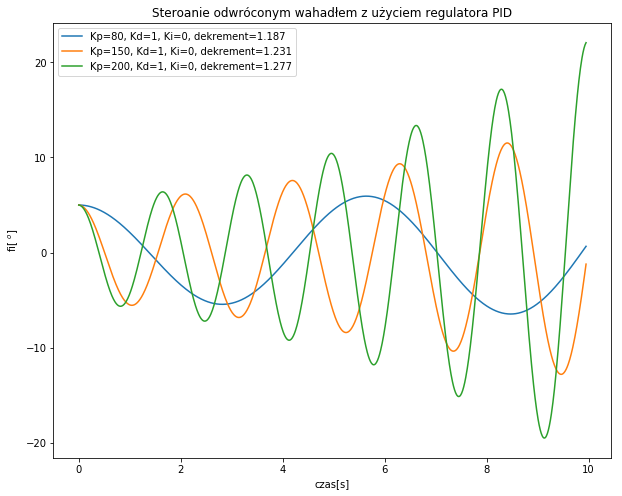

In [92]:
plt.figure(figsize=(10,8))
plt.xlabel("czas[s]")
plt.ylabel("fi[$\ ^o$]")
plt.title("Steroanie odwróconym wahadłem z użyciem regulatora PID")

Kp = 80
Ki=0
Kd=1
r = Record()
r.position_set(5)
r.PID_control(how_many_iter=200, Kp=Kp, Ki=Ki, Kd=Kd)  # Here are PID parameters
dek = log_dek(find_minimums(np.array(r.stack_of_movement['fi'])))
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi, label=("Kp=%0.0f, Kd=%0.0f, Ki=%0.0f, dekrement=%0.3f"%(Kp, Kd, Ki, dek[0])))

Kp = 150
Ki=0
Kd=1
r = Record()
r.position_set(5)
r.PID_control(how_many_iter=200, Kp=Kp, Ki=Ki, Kd=Kd)  # Here are PID parameters
dek = log_dek(find_minimums(np.array(r.stack_of_movement['fi'])))
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi, label=("Kp=%0.0f, Kd=%0.0f, Ki=%0.0f, dekrement=%0.3f"%(Kp, Kd, Ki, dek[0])))

Kp = 200
Ki=0
Kd=1
r = Record()
r.position_set(5)
r.PID_control(how_many_iter=200, Kp=Kp, Ki=Ki, Kd=Kd)  # Here are PID parameters
dek = log_dek(find_minimums(np.array(r.stack_of_movement['fi'])))
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi, label=("Kp=%0.0f, Kd=%0.0f, Ki=%0.0f, dekrement=%0.3f"%(Kp, Kd, Ki, dek[0])))


plt.legend()
plt.show()

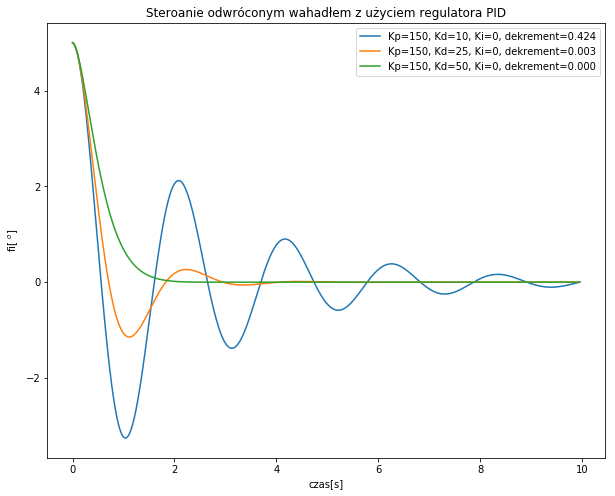

In [93]:
plt.figure(figsize=(10,8))
plt.xlabel("czas[s]")
plt.ylabel("fi[$\ ^o$]")
plt.title("Steroanie odwróconym wahadłem z użyciem regulatora PID")

Kp = 150
Ki=0
Kd=10
r = Record()
r.position_set(5)
r.PID_control(how_many_iter=200, Kp=Kp, Ki=Ki, Kd=Kd)  # Here are PID parameters
dek = log_dek(find_minimums(np.array(r.stack_of_movement['fi'])))
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi, label=("Kp=%0.0f, Kd=%0.0f, Ki=%0.0f, dekrement=%0.3f"%(Kp, Kd, Ki, dek[0])))

Kp = 150
Ki=0
Kd=25
r = Record()
r.position_set(5)
r.PID_control(how_many_iter=200, Kp=Kp, Ki=Ki, Kd=Kd)  # Here are PID parameters
dek = log_dek(find_minimums(np.array(r.stack_of_movement['fi'])))
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi, label=("Kp=%0.0f, Kd=%0.0f, Ki=%0.0f, dekrement=%0.3f"%(Kp, Kd, Ki, dek[0])))

Kp = 150
Ki=0
Kd=50
r = Record()
r.position_set(5)
r.PID_control(how_many_iter=200, Kp=Kp, Ki=Ki, Kd=Kd)  # Here are PID parameters
dek = log_dek(find_minimums(np.array(r.stack_of_movement['fi'])))
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi, label=("Kp=%0.0f, Kd=%0.0f, Ki=%0.0f, dekrement=%0.3f"%(Kp, Kd, Ki, dek[0])))


plt.legend()
plt.show()

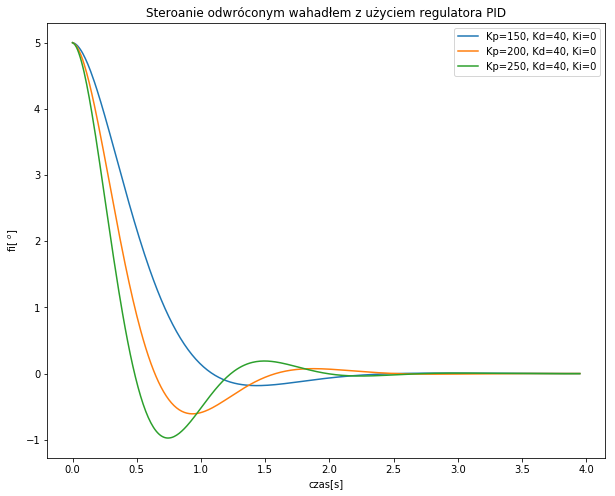

In [98]:
plt.figure(figsize=(10,8))
plt.xlabel("czas[s]")
plt.ylabel("fi[$\ ^o$]")
plt.title("Steroanie odwróconym wahadłem z użyciem regulatora PID")

Kp = 150
Ki=0
Kd=40
r = Record()
r.position_set(5)
r.PID_control(how_many_iter=80, Kp=Kp, Ki=Ki, Kd=Kd)  # Here are PID parameters
dek = log_dek(find_minimums(np.array(r.stack_of_movement['fi'])))
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi, label=("Kp=%0.0f, Kd=%0.0f, Ki=%0.0f"%(Kp, Kd, Ki)))

Kp = 200
Ki=0
Kd=40
r = Record()
r.position_set(5)
r.PID_control(how_many_iter=80, Kp=Kp, Ki=Ki, Kd=Kd)  # Here are PID parameters
dek = log_dek(find_minimums(np.array(r.stack_of_movement['fi'])))
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi, label=("Kp=%0.0f, Kd=%0.0f, Ki=%0.0f"%(Kp, Kd, Ki)))
Kp = 250
Ki=0
Kd=40
r = Record()
r.position_set(5)
r.PID_control(how_many_iter=80, Kp=Kp, Ki=Ki, Kd=Kd)  # Here are PID parameters
dek = log_dek(find_minimums(np.array(r.stack_of_movement['fi'])))
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi, label=("Kp=%0.0f, Kd=%0.0f, Ki=%0.0f"%(Kp, Kd, Ki)))

plt.legend()
plt.show()

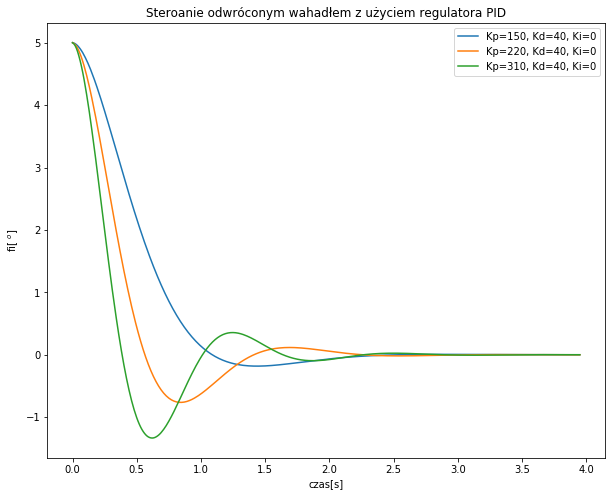

In [100]:
plt.figure(figsize=(10,8))
plt.xlabel("czas[s]")
plt.ylabel("fi[$\ ^o$]")
plt.title("Steroanie odwróconym wahadłem z użyciem regulatora PID")

Kp = 150
Ki=0
Kd=40
r = Record()
r.position_set(5)
r.PID_control(how_many_iter=80, Kp=Kp, Ki=Ki, Kd=Kd)  # Here are PID parameters
dek = log_dek(find_minimums(np.array(r.stack_of_movement['fi'])))
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi, label=("Kp=%0.0f, Kd=%0.0f, Ki=%0.0f"%(Kp, Kd, Ki)))

Kp = 220
Ki=0
Kd=40
r = Record()
r.position_set(5)
r.PID_control(how_many_iter=80, Kp=Kp, Ki=Ki, Kd=Kd)  # Here are PID parameters
dek = log_dek(find_minimums(np.array(r.stack_of_movement['fi'])))
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi, label=("Kp=%0.0f, Kd=%0.0f, Ki=%0.0f"%(Kp, Kd, Ki)))

Kp = 310
Ki=0
Kd=40
r = Record()
r.position_set(5)
r.PID_control(how_many_iter=80, Kp=Kp, Ki=Ki, Kd=Kd)  # Here are PID parameters
dek = log_dek(find_minimums(np.array(r.stack_of_movement['fi'])))
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi, label=("Kp=%0.0f, Kd=%0.0f, Ki=%0.0f"%(Kp, Kd, Ki)))

plt.legend()
plt.show()

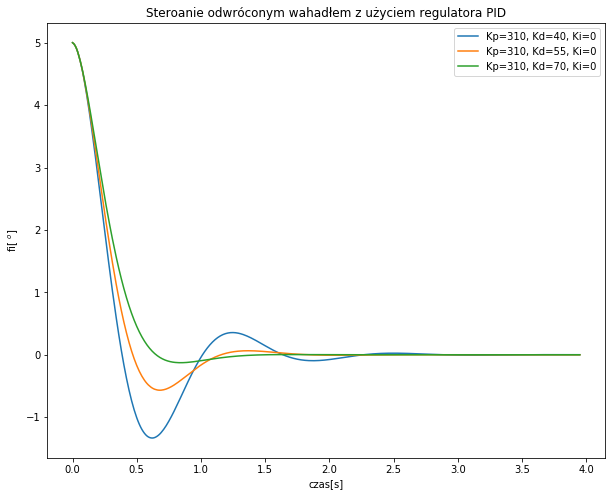

In [101]:
plt.figure(figsize=(10,8))
plt.xlabel("czas[s]")
plt.ylabel("fi[$\ ^o$]")
plt.title("Steroanie odwróconym wahadłem z użyciem regulatora PID")

Kp = 310
Ki=0
Kd=40
r = Record()
r.position_set(5)
r.PID_control(how_many_iter=80, Kp=Kp, Ki=Ki, Kd=Kd)  # Here are PID parameters
dek = log_dek(find_minimums(np.array(r.stack_of_movement['fi'])))
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi, label=("Kp=%0.0f, Kd=%0.0f, Ki=%0.0f"%(Kp, Kd, Ki)))

Kp = 310
Ki=0
Kd=55
r = Record()
r.position_set(5)
r.PID_control(how_many_iter=80, Kp=Kp, Ki=Ki, Kd=Kd)  # Here are PID parameters
dek = log_dek(find_minimums(np.array(r.stack_of_movement['fi'])))
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi, label=("Kp=%0.0f, Kd=%0.0f, Ki=%0.0f"%(Kp, Kd, Ki)))

Kp = 310
Ki=0
Kd=70
r = Record()
r.position_set(5)
r.PID_control(how_many_iter=80, Kp=Kp, Ki=Ki, Kd=Kd)  # Here are PID parameters
dek = log_dek(find_minimums(np.array(r.stack_of_movement['fi'])))
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi, label=("Kp=%0.0f, Kd=%0.0f, Ki=%0.0f"%(Kp, Kd, Ki)))

plt.legend()
plt.show()

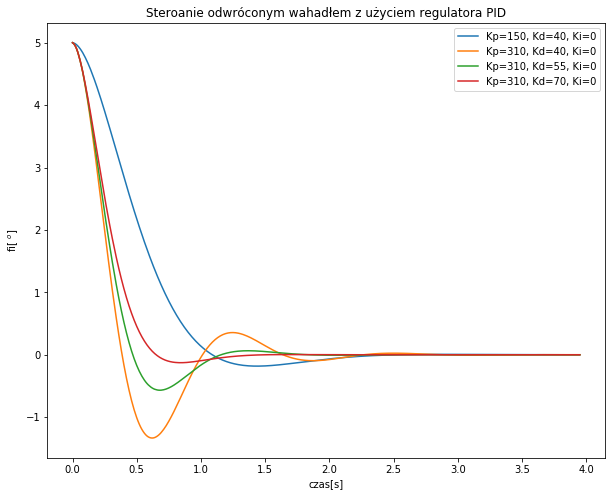

In [102]:
plt.figure(figsize=(10,8))
plt.xlabel("czas[s]")
plt.ylabel("fi[$\ ^o$]")
plt.title("Steroanie odwróconym wahadłem z użyciem regulatora PID")

Kp = 150
Ki=0
Kd=40
r = Record()
r.position_set(5)
r.PID_control(how_many_iter=80, Kp=Kp, Ki=Ki, Kd=Kd)  # Here are PID parameters
dek = log_dek(find_minimums(np.array(r.stack_of_movement['fi'])))
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi, label=("Kp=%0.0f, Kd=%0.0f, Ki=%0.0f"%(Kp, Kd, Ki)))


Kp = 310
Ki=0
Kd=40
r = Record()
r.position_set(5)
r.PID_control(how_many_iter=80, Kp=Kp, Ki=Ki, Kd=Kd)  # Here are PID parameters
dek = log_dek(find_minimums(np.array(r.stack_of_movement['fi'])))
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi, label=("Kp=%0.0f, Kd=%0.0f, Ki=%0.0f"%(Kp, Kd, Ki)))

Kp = 310
Ki=0
Kd=55
r = Record()
r.position_set(5)
r.PID_control(how_many_iter=80, Kp=Kp, Ki=Ki, Kd=Kd)  # Here are PID parameters
dek = log_dek(find_minimums(np.array(r.stack_of_movement['fi'])))
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi, label=("Kp=%0.0f, Kd=%0.0f, Ki=%0.0f"%(Kp, Kd, Ki)))

Kp = 310
Ki=0
Kd=70
r = Record()
r.position_set(5)
r.PID_control(how_many_iter=80, Kp=Kp, Ki=Ki, Kd=Kd)  # Here are PID parameters
dek = log_dek(find_minimums(np.array(r.stack_of_movement['fi'])))
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi, label=("Kp=%0.0f, Kd=%0.0f, Ki=%0.0f"%(Kp, Kd, Ki)))

plt.legend()
plt.show()

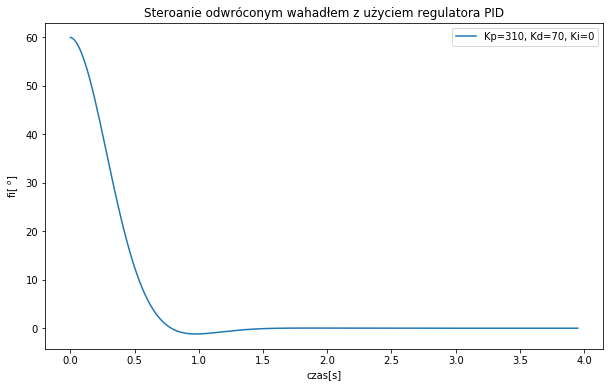

In [115]:
plt.figure(figsize=(10,6))
plt.xlabel("czas[s]")
plt.ylabel("fi[$\ ^o$]")
plt.title("Steroanie odwróconym wahadłem z użyciem regulatora PID")

Kp = 310
Ki=0
Kd=70
r = Record()
r.position_set(60)
r.PID_control(how_many_iter=80, Kp=Kp, Ki=Ki, Kd=Kd)  # Here are PID parameters
dek = log_dek(find_minimums(np.array(r.stack_of_movement['fi'])))
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi, label=("Kp=%0.0f, Kd=%0.0f, Ki=%0.0f"%(Kp, Kd, Ki)))

plt.legend()
plt.show()

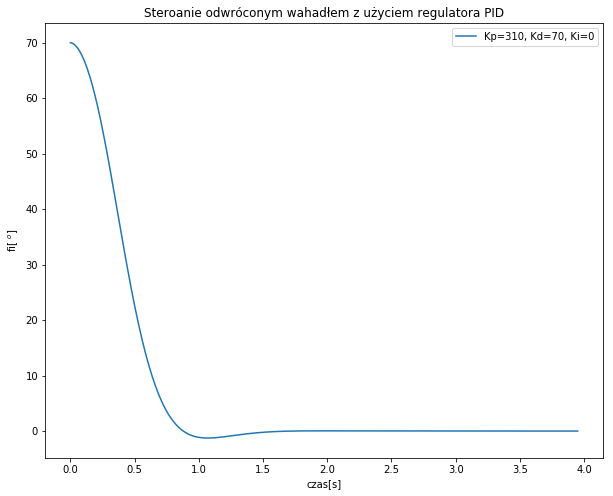

In [104]:
plt.figure(figsize=(10,6))
plt.xlabel("czas[s]")
plt.ylabel("fi[$\ ^o$]")
plt.title("Sterowanie odwróconym wahadłem z użyciem regulatora PID")

Kp = 310
Ki=0
Kd=70
r = Record()
r.position_set(70)
r.PID_control(how_many_iter=80, Kp=Kp, Ki=Ki, Kd=Kd)  # Here are PID parameters
dek = log_dek(find_minimums(np.array(r.stack_of_movement['fi'])))
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi, label=("Kp=%0.0f, Kd=%0.0f, Ki=%0.0f"%(Kp, Kd, Ki)))

plt.legend()
plt.show()

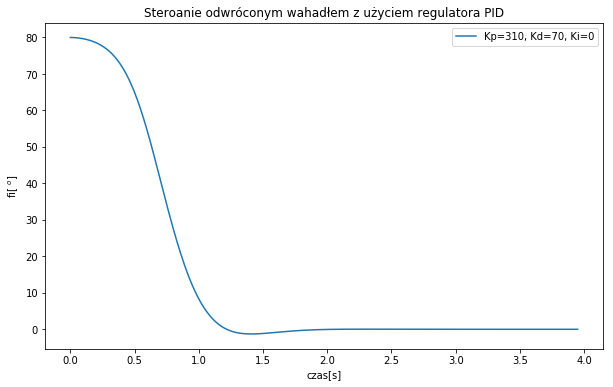

In [114]:
plt.figure(figsize=(10,6))
plt.xlabel("czas[s]")
plt.ylabel("fi[$\ ^o$]")
plt.title("Sterowanie odwróconym wahadłem z użyciem regulatora PID")

Kp = 310
Ki=0
Kd=70
r = Record()
r.position_set(80)
r.PID_control(how_many_iter=80, Kp=Kp, Ki=Ki, Kd=Kd)  # Here are PID parameters
dek = log_dek(find_minimums(np.array(r.stack_of_movement['fi'])))
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi, label=("Kp=%0.0f, Kd=%0.0f, Ki=%0.0f"%(Kp, Kd, Ki)))

plt.legend()
plt.show()

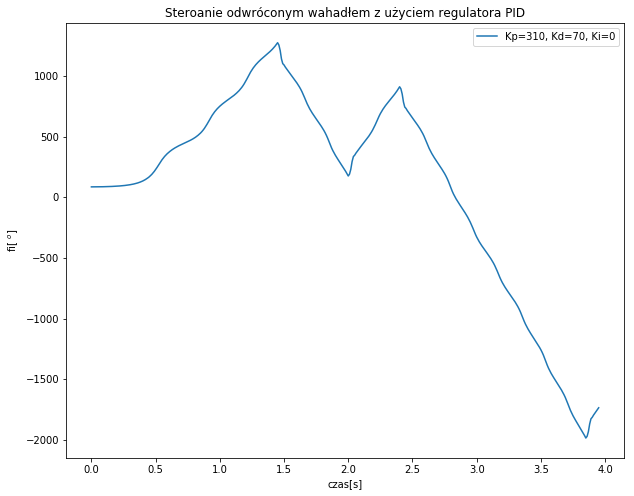

In [107]:
plt.figure(figsize=(10,8))
plt.xlabel("czas[s]")
plt.ylabel("fi[$\ ^o$]")
plt.title("Sterowanie odwróconym wahadłem z użyciem regulatora PID")

Kp = 310
Ki=0
Kd=70
r = Record()
r.position_set(85)
r.PID_control(how_many_iter=80, Kp=Kp, Ki=Ki, Kd=Kd)  # Here are PID parameters
dek = log_dek(find_minimums(np.array(r.stack_of_movement['fi'])))
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi, label=("Kp=%0.0f, Kd=%0.0f, Ki=%0.0f"%(Kp, Kd, Ki)))

plt.legend()
plt.show()

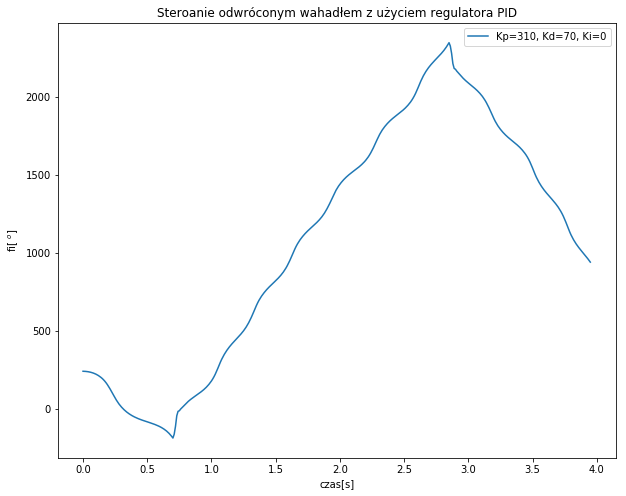

In [109]:
plt.figure(figsize=(10,8))
plt.xlabel("czas[s]")
plt.ylabel("fi[$\ ^o$]")
plt.title("Sterowanie odwróconym wahadłem z użyciem regulatora PID")

Kp = 310
Ki=0
Kd=70
r = Record()
r.position_set(240)
r.PID_control(how_many_iter=80, Kp=Kp, Ki=Ki, Kd=Kd)  # Here are PID parameters
dek = log_dek(find_minimums(np.array(r.stack_of_movement['fi'])))
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi, label=("Kp=%0.0f, Kd=%0.0f, Ki=%0.0f"%(Kp, Kd, Ki)))

plt.legend()
plt.show()

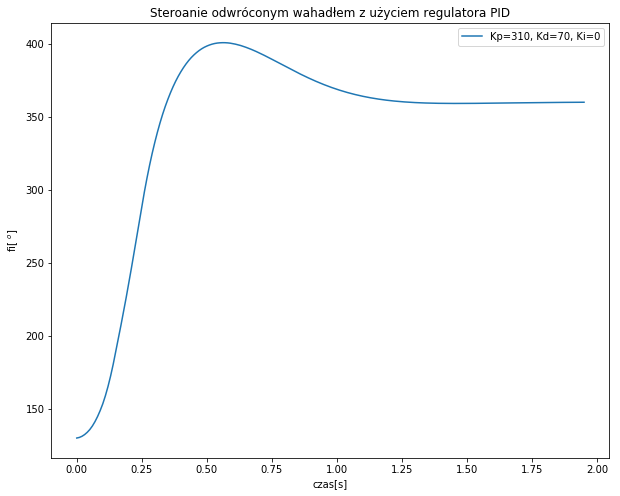

In [111]:
plt.figure(figsize=(10,8))
plt.xlabel("czas[s]")
plt.ylabel("fi[$\ ^o$]")
plt.title("Sterowanie odwróconym wahadłem z użyciem regulatora PID")

Kp = 310
Ki=0
Kd=70
r = Record()
r.position_set(130)
r.PID_control(how_many_iter=40, Kp=Kp, Ki=Ki, Kd=Kd)  # Here are PID parameters
dek = log_dek(find_minimums(np.array(r.stack_of_movement['fi'])))
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi, label=("Kp=%0.0f, Kd=%0.0f, Ki=%0.0f"%(Kp, Kd, Ki)))

plt.legend()
plt.show()

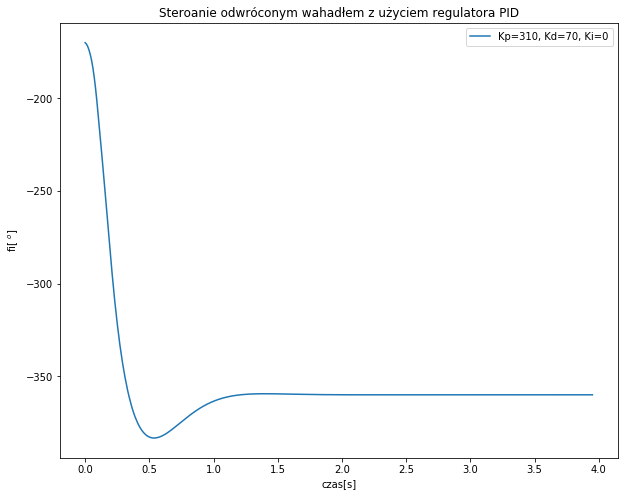

In [113]:
plt.figure(figsize=(10,8))
plt.xlabel("czas[s]")
plt.ylabel("fi[$\ ^o$]")
plt.title("Sterowanie odwróconym wahadłem z użyciem regulatora PID")

Kp = 310
Ki=0
Kd=70
r = Record()
r.position_set(-170)
r.PID_control(how_many_iter=80, Kp=Kp, Ki=Ki, Kd=Kd)  # Here are PID parameters
dek = log_dek(find_minimums(np.array(r.stack_of_movement['fi'])))
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi, label=("Kp=%0.0f, Kd=%0.0f, Ki=%0.0f"%(Kp, Kd, Ki)))

plt.legend()
plt.show()

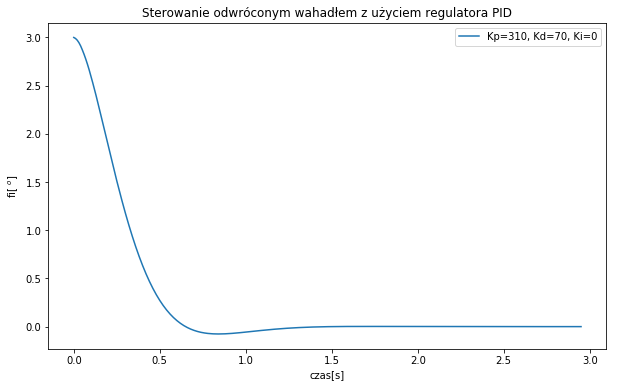

In [116]:
plt.figure(figsize=(10,6))
plt.xlabel("czas[s]")
plt.ylabel("fi[$\ ^o$]")
plt.title("Sterowanie odwróconym wahadłem z użyciem regulatora PID")

Kp = 310
Ki=0
Kd=70
r = Record()
r.position_set(3)
r.PID_control(how_many_iter=60, Kp=Kp, Ki=Ki, Kd=Kd)  # Here are PID parameters
dek = log_dek(find_minimums(np.array(r.stack_of_movement['fi'])))
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi, label=("Kp=%0.0f, Kd=%0.0f, Ki=%0.0f"%(Kp, Kd, Ki)))

plt.legend()
plt.show()

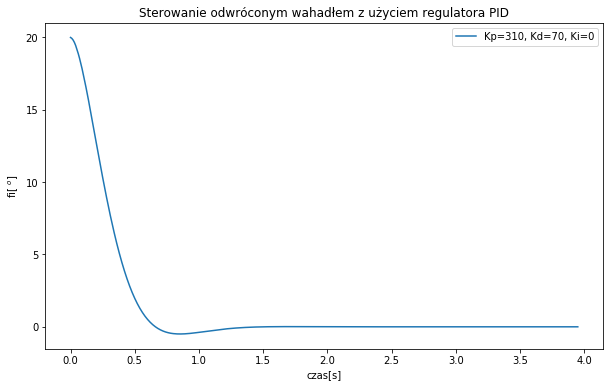

In [128]:
plt.figure(figsize=(10,6))
plt.xlabel("czas[s]")
plt.ylabel("fi[$\ ^o$]")
plt.title("Sterowanie odwróconym wahadłem z użyciem regulatora PID")

Kp = 310
Ki=0
Kd=70
r = Record()
r.position_set(20)
r.PID_control(how_many_iter=80, Kp=Kp, Ki=Ki, Kd=Kd)  # Here are PID parameters
dek = log_dek(find_minimums(np.array(r.stack_of_movement['fi'])))
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi, label=("Kp=%0.0f, Kd=%0.0f, Ki=%0.0f"%(Kp, Kd, Ki)))

plt.legend()
plt.show()

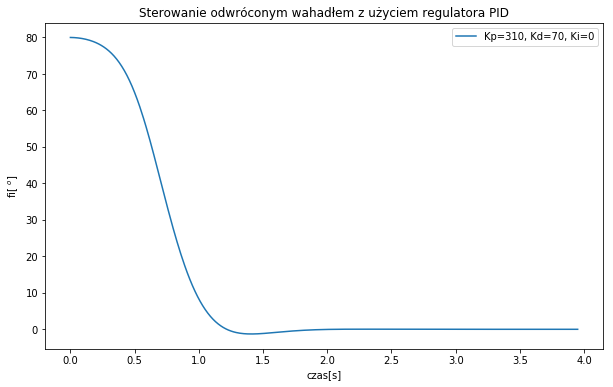

In [118]:
plt.figure(figsize=(10,6))
plt.xlabel("czas[s]")
plt.ylabel("fi[$\ ^o$]")
plt.title("Sterowanie odwróconym wahadłem z użyciem regulatora PID")

Kp = 310
Ki=0
Kd=70
r = Record()
r.position_set(80)
r.PID_control(how_many_iter=80, Kp=Kp, Ki=Ki, Kd=Kd)  # Here are PID parameters
dek = log_dek(find_minimums(np.array(r.stack_of_movement['fi'])))
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi, label=("Kp=%0.0f, Kd=%0.0f, Ki=%0.0f"%(Kp, Kd, Ki)))

plt.legend()
plt.show()

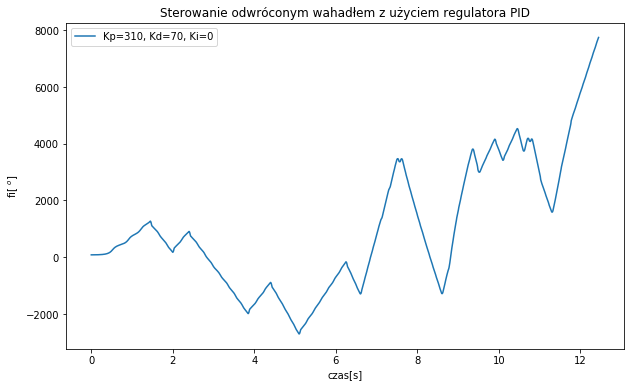

In [120]:
plt.figure(figsize=(10,6))
plt.xlabel("czas[s]")
plt.ylabel("fi[$\ ^o$]")
plt.title("Sterowanie odwróconym wahadłem z użyciem regulatora PID")

Kp = 310
Ki=0
Kd=70
r = Record()
r.position_set(85)
r.PID_control(how_many_iter=250, Kp=Kp, Ki=Ki, Kd=Kd)  # Here are PID parameters
dek = log_dek(find_minimums(np.array(r.stack_of_movement['fi'])))
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi, label=("Kp=%0.0f, Kd=%0.0f, Ki=%0.0f"%(Kp, Kd, Ki)))

plt.legend()
plt.show()

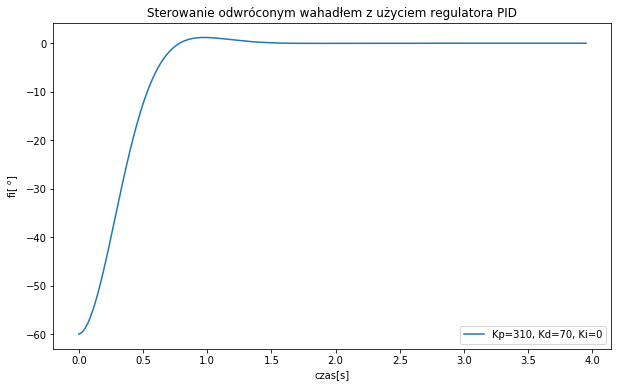

In [121]:
plt.figure(figsize=(10,6))
plt.xlabel("czas[s]")
plt.ylabel("fi[$\ ^o$]")
plt.title("Sterowanie odwróconym wahadłem z użyciem regulatora PID")

Kp = 310
Ki=0
Kd=70
r = Record()
r.position_set(-60)
r.PID_control(how_many_iter=80, Kp=Kp, Ki=Ki, Kd=Kd)  # Here are PID parameters
dek = log_dek(find_minimums(np.array(r.stack_of_movement['fi'])))
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi, label=("Kp=%0.0f, Kd=%0.0f, Ki=%0.0f"%(Kp, Kd, Ki)))

plt.legend()
plt.show()

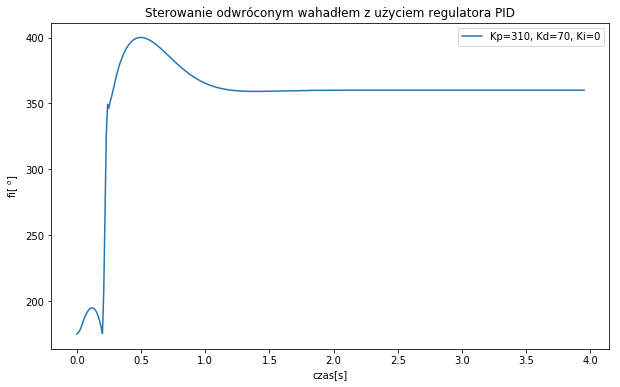

In [123]:
plt.figure(figsize=(10,6))
plt.xlabel("czas[s]")
plt.ylabel("fi[$\ ^o$]")
plt.title("Sterowanie odwróconym wahadłem z użyciem regulatora PID")

Kp = 310
Ki=0
Kd=70
r = Record()
r.position_set(175)
r.PID_control(how_many_iter=80, Kp=Kp, Ki=Ki, Kd=Kd)  # Here are PID parameters
dek = log_dek(find_minimums(np.array(r.stack_of_movement['fi'])))
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi, label=("Kp=%0.0f, Kd=%0.0f, Ki=%0.0f"%(Kp, Kd, Ki)))

plt.legend()
plt.show()

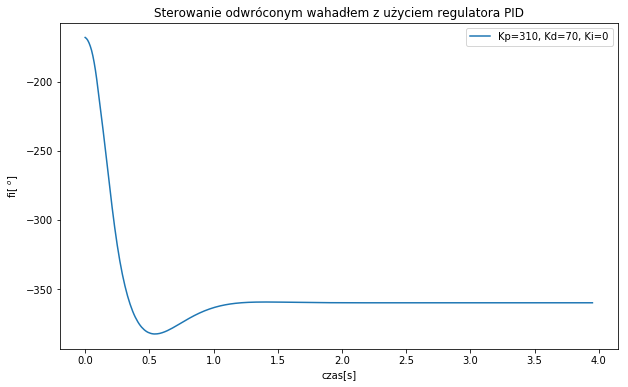

In [137]:
plt.figure(figsize=(10,6))
plt.xlabel("czas[s]")
plt.ylabel("fi[$\ ^o$]")
plt.title("Sterowanie odwróconym wahadłem z użyciem regulatora PID")

Kp = 310
Ki=0
Kd=70
r = Record()
r.position_set(-168)
r.PID_control(how_many_iter=80, Kp=Kp, Ki=Ki, Kd=Kd)  # Here are PID parameters
dek = log_dek(find_minimums(np.array(r.stack_of_movement['fi'])))
plt.plot(r.stack_of_movement['t'], r.stack_of_movement['fi']*180/np.pi, label=("Kp=%0.0f, Kd=%0.0f, Ki=%0.0f"%(Kp, Kd, Ki)))

plt.legend()
plt.show()